# Física Nuclear y de Partículas
## Ejercicio voluntario, análisis de datos simulados.
## desintegraciones del tau

*autores: D. Costas, J.A. Hernando*

*versión: Noviembre 2022*

## Introducción

El fichero *taus_45GeV.csv* contiene una muestra de eventos con desintegraciones $\tau$ de 45 GeV de Energía.

Cada evento contiene la lista de las párticulas detectadas por un experimento ideal, con su la posicion (en mm), el momento (en MeV), la energía (en MeV). 

Los taus se producen en el origen y el experimento mide con exactitud la posición, el momento y energía de los $\gamma, \, e^\pm, \, \mu^\pm, \pi^\pm$ que alcanzan un detector ideal que es una esfera de 5 cm centrada en el origen.

Los datos están organizados en una tabla. Cada fila corresponde a una partícula y cada columna corresponde a una variable, por ejemplo, la energía de las partículas viene dada en la columna con la etiqueta *E*. Una de las columnas es el número del evento (*event*). Para seleccionar las partículas de un evento, seleccionamos las filas que tiene el mismo número de evento en la columna *event*.

En este *notebook* diponéis de código adicional que os facilitará los cálculos y ejemplos de cómo usarlo. Pero podéis utilizar la herramienta que prefiráis.

El trabajo se puede realizar individual o en grupos de no más de 4 personas, y lo podéis entragar en el formato que prefiráis en la tarea correspondiente del aula virtual.


## Ejercicio

Con la presente muestra de datos, desarrolla el siguuiente análisis y responde a alguna de las cuestiones:

  * ¿Cuántos $\tau^-$ y $\tau^+$ hay en la muestra? 

  * Estima con esta muestra la fracción de desintegración en los canales principales del $\tau$.

    - ¿Cuáles son los canales detectados y su fracción de producción? 
    
    - Asocia e identidica los canales detectados con los canales de desintegración del $\tau$ (revisa para ello las páginas de PDG del $\tau$ y $\pi^0, \pi^\pm$.

  * Compara la distribución de la energía del $e^\pm$ y $\mu^\pm$ en los eventos con uno solo de esos leptones. 
  
    - Comparala ahora esas distribuciones con la del $\pi^\pm$ en los eventos donde solo se emite un $\pi^\pm$. 

  * Calcula la distancia de vuelo del $\tau$ reconstruyendo su vértice de desintegración. Estima el tiempo de vida media del $\tau$.

      - Verifica que la masa invariante de los eventos con dos $\gamma$ corresponde a la masa de un $\pi^0$

      - Considera que las partículas no están sometidas a un campo magnético y que sus trayectorias son línea rectas.

      - Utilizara los canales con 1 $\pi^0$ o con 3 piones cargados para obtener la distribución de la distancia de vuelo.

      - En dichos canales ¿Puedes reconstruir el momento del $\nu_\tau$ que escapa indetectado?

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
## NOTA: ¡Modifica la variable *datadir* para que apunte al directorio de tu ordenador donde has guardado el fichero de datos!
datadir  = "/Users/hernando/work/docencia/grado/Fisica_Nuclear_y_de_Partículas/data/"
datafile = "/taus_45GeV.csv"
data     = pd.read_csv(datadir + datafile)

In [5]:
data

,event,particleName,x,y,z,px,py,pz,E
0,0,gamma,-46.665398,14.573922,10.485294,-4108.790087,1283.199766,923.202142,4402.392510
1,0,gamma,-46.554595,14.452292,11.126588,-21958.518406,6816.712327,5248.202276,23583.632558
2,0,pi-,-46.000031,16.477644,10.605868,-9160.779055,3281.545421,2112.151205,9958.367124
3,1,mu+,-13.628892,-3.544433,-47.975935,-5514.644806,-1398.599609,-19290.163449,20111.910844
4,2,gamma,47.077349,-14.529804,8.521030,1265.384717,-389.821084,228.823194,1343.696027
...,...,...,...,...,...,...,...,...,...
65334,29997,pi+,17.005018,-24.666768,40.029738,2118.552388,-3075.607023,4991.097398,6235.235026
65335,29998,gamma,34.489961,6.631228,35.587490,3224.056973,623.609560,3321.844324,4670.982976
65336,29998,gamma,35.298867,6.010952,34.897829,4330.902982,740.133289,4270.943351,6127.436253
65337,29998,pi+,33.336556,3.488380,37.101284,16128.464281,1671.441608,17957.905008,24195.596897


## Code


In [6]:
from collections import namedtuple
Particle = namedtuple('Particle', ('x', 'p', 'E', "name"))
def event_particles(data, event_number):
    """
    return the list of particles an event
    
    Inputs
        data          : DataFrame, 
        event_number  : int, number of event
    
    Return
        particles : a list of particles
        each particle has
            x    : np.array, 3D vector, the detected position (mm)
            p    : np.array, 3D vector, the detected momemtum  (MeV)
            E    : float, detected energy (MeV)
            name : string, name of the particle, i.e. "e+"
    """
    dpars = data[data.event == event_number] ## get the particles of the same event
    npars = len(dpars) ## number of particles in the event
    pars  = [Particle(np.array((dpars.x.values[i] , dpars.y.values[i] , dpars.z.values[i])), 
                      np.array((dpars.px.values[i], dpars.py.values[i], dpars.pz.values[i])),
                      dpars.E.values[i], dpars.particleName.values[i]) for i in range(npars)]
    return pars


In [7]:
def event_channel(data, event_number):
    """ return the detected channel, a string with the list of the different types of particles and how many times they are in the the event
    i.e: '2 gamma, 1 pi-', indicates that in the event with number *event_number* has been detected 2 gammas and 1 pi-

    Inputs:    
        data          : DataFrame, 
        event_number  : int, number of event

    Returns:
        str, string with the count of the different type of particle in the event
    """
    edata = data[data.event == event_number] ## get the particles of the event
    pars  = list(edata.particleName) ## get the names of the particles 
    pars.sort()
    spars = str([str(pars.count(name))+' '+name for name in set(pars)])
    spars = spars.replace("'", "")
    spars = spars.replace("[", "")
    spars = spars.replace("]", "")
    return spars


In [8]:
def event_charge(data, event_number):
    """ returns the event charge (in e units)
    
    Inputs:
        data         : DataFrame
        event_number : int, event number
    
    Returns
        charge       : int, the charge of the event
    """
    edata  = data[data.event == event_number] # get the particle of the event
    names  = str(list(edata.particleName)) ## get the event of the particles
    nplus  = names.count("+") ## count how many are '+'
    nminus = names.count("-") ## count how many are '-'
    charge = nplus - nminus
    return charge

In [9]:
import scipy.linalg as la
def intersection_of_straight_lines(x1, v1, x2, v2):
    """ compute the instersection point of two straight lines

    Inputs:
        x1: tuple or np.array, reference point of line 1
        v1: tuple or np.array, direction vector of line 1
        x1: tuple or np.array, reference point of line 1
        v1: tuple or np.array, direction vector of line 1

    Returns:
        x: np.array, the closest point of line 1 to the intersection
                     the intersection point if both lines really intersect

    Algorithm:
        Intersection of two straight lines:
            x1(t) = x1 + t1 * v1
            x2(t) = x2 + t2 * v2,
        where x1 is a point in the line 1 and v1 is the direction vector (i.e momentum), and t1 is the running parameter.
        x1, v2, t2 the same for line 2. 
        
        condition: x1(t) = x2(t) => x2- x1 = t1 * v1 - t2 * v2
        solve the equations and estimate the two scalars: t1 and t2 
    """


    x1 = np.array(x1)
    x2 = np.array(x2)
    v1 = np.array(v1)
    v2 = np.array(v2)

    bb = x2 - x1
    ndim = len(bb)
    aa = np.zeros((ndim, 2))
    aa[:, 0] =  v1
    aa[:, 1] = -v2

    tt = la.lstsq(aa, bb)[0]
    x1i = x1 + tt[0] * v1
    return x1i


## Ejemplos

### Obtener el número de eventos

In [10]:
## Number of events in the data
nevents = len(np.unique(data.event.values))
print(" number of events {:d}".format(nevents))

 number of events 30000


### Obtener las partículas de un evento

In [11]:
## get the particles of the event number 0
ievent    = 0
particles = data[data.event == ievent]
particles

,event,particleName,x,y,z,px,py,pz,E
0,0,gamma,-46.665398,14.573922,10.485294,-4108.790087,1283.199766,923.202142,4402.392510
1,0,gamma,-46.554595,14.452292,11.126588,-21958.518406,6816.712327,5248.202276,23583.632558
2,0,pi-,-46.000031,16.477644,10.605868,-9160.779055,3281.545421,2112.151205,9958.367124


In [12]:
## alternative way to get the particles of the event number 0
ievents   = 0
particles = event_particles(data, ievent)
for i, particle in enumerate(particles):
    print(" particle: index = ", i, 
           ", position x = "   , particle.x,
           ", momentum p = "   , particle.p,
           ", Energy E = "     , particle.E,
          ", type = "          , particle.name)

 particle: index =  0 , position x =  [-46.66539837  14.57392213  10.48529394] , momentum p =  [-4108.79008681  1283.19976634   923.20214219] , Energy E =  4402.39251011878 , type =  gamma
 particle: index =  1 , position x =  [-46.55459489  14.45229176  11.12658788] , momentum p =  [-21958.51840571   6816.71232738   5248.20227557] , Energy E =  23583.63255848045 , type =  gamma
 particle: index =  2 , position x =  [-46.00003078  16.47764361  10.60586768] , momentum p =  [-9160.77905515  3281.54542054  2112.15120504] , Energy E =  9958.367123688897 , type =  pi-


### Obtener la lista con el número de los distintos tipos de partículas detectadas en un evento

In [13]:
## detected channel of the event 0
ievent  = 0
channel = event_channel(data, ievent)
print("Detected channel (particles) of event {:d} = {:s}".format(ievent, channel))

Detected channel (particles) of event 0 = 2 gamma, 1 pi-


### Obtener la carga de un evento

In [14]:
# charge of the event 0
ievent = 0
charge = event_charge(data, ievent)
print("Total electric charge of the event {:d} = {:d} (e)".format(ievent, charge))

Total electric charge of the event 0 = -1 (e)


### Obtener la distribución de energía de los muones en eventos con un solo muón.

Total number of events with 1 mu- = 2816
Average muon energy E = 16328.989 MeV


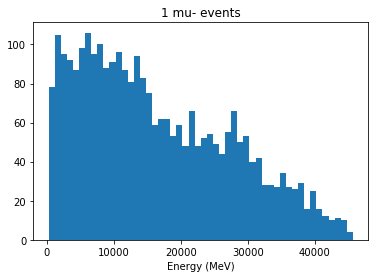

In [15]:
## Energy distribution of the events with 1 muon
energies = []
for ievent in range(nevents):
    channel = event_channel(data, ievent) # get the detected channel
    if (channel == "1 mu-"):  # select only events with only 1 muon
        particles   = event_particles(data, ievent) # get the particles of the event
        muons       = [particle for particle in particles if particle.name == "mu-"] # select only the muons (there is only 1!)
        muon        = muons[0] # take the 1 muon from the list of muons
        muon_energy = muon.E
        energies.append(muon_energy)

plt.hist(energies, bins = 50)
plt.xlabel("Energy (MeV)")
plt.title("1 mu- events")
print("Total number of events with 1 mu- = {:d}".format(len(energies)))
print("Average muon energy E = {:4.3f} MeV".format(np.mean(energies)))

### Obtener la masa invariante de dos gammas en un evento

In [14]:
## We compute the invariant mass of the gammas of the event 0
ievent    = 0
particles = event_particles(data, ievent)
gammas    = [particle for particle in particles if particle.name == "gamma"]
gamma1    = gammas[0]
gamma2    = gammas[1]
energy_sum   = gamma1.E + gamma2.E
momentum_sum = gamma1.p + gamma2.p
inv_mass     = np.sqrt( (energy_sum)**2 - sum(momentum_sum * momentum_sum))
print("Event {:d}, invariant mass of the 2 gammas = {:4.3f} MeV".format(ievent, inv_mass))
# Notice that 135 is the mass of the pi0! 
# Look for the lifetime and decays of the pi0 in the PDG

Event 0, invariant mass of the 2 gammas = 134.977 MeV


### Obtener el punto de intersección, el vértice de producción, de dos gammas que provienen de un $\pi^0$

In [15]:
## We compute the veretex of the two gammas generated from the pi0 decay of the event 0
ievent    = 0
particles = event_particles(data, ievent) 
gammas    = [particle for particle in particles if particle.name == "gamma"]
gamma1    = gammas[0]
gamma2    = gammas[1]
gamma1_x  = gamma1.x
gamma1_p  = gamma1.p
gamma2_x  = gamma2.x
gamma2_p  = gamma2.p
vertex    = intersection_of_straight_lines(gamma1_x, gamma1_p, gamma2_x, gamma2_p)
print("Vertex of the two gammas (in mm) = " , vertex)

Vertex of the two gammas (in mm) =  [-0.01915488  0.00602076  0.00437109]


### Calcular la distancia de vuelo del $\tau$ en un evento con un $\pi^0$

In [16]:
## In the event 0, the 2 gammas come from the p0 decay, which decay inmediately and which is a decay product of the tau. 
## Therefore, the vertex of the 2 gammas, is the vertex of the tau decay
## As the taus are produced at origin (0, 0, 0), we compute the fliht distance of the tau of the event 0
ievent    = 0
particles = event_particles(data, ievent) 
gammas    = [particle for particle in particles if particle.name == "gamma"]
gamma1    = gammas[0]
gamma2    = gammas[1]
vertex    = intersection_of_straight_lines(gamma1.x, gamma1.p, gamma2.x, gamma2.p)
distance  = np.sqrt(sum(vertex * vertex))
print("Event {:d}, tau flight distance = {:4.3f} mm".format(ievent, distance))

Event 0, tau flight distance = 0.021 mm
